# Capítulo 2 - Introdução ao Python

Vamos começar revisando alguns comandos bem básicos só para nos acostumarmos com algumas coisas relativas ao ambiente.

## Comandos básicos

In [1]:
print("Ajuste um modelo com", 11, "variaveis")

Ajuste um modelo com 11 variaveis


Com o comando abaixo, podemos obter mais informações sobre como utilizar funções em python, obtendo uma descrição delas:

In [2]:
print?

Docstring:
print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)

Prints the values to a stream, or to sys.stdout by default.
Optional keyword arguments:
file:  a file-like object (stream); defaults to the current sys.stdout.
sep:   string inserted between values, default a space.
end:   string appended after the last value, default a newline.
flush: whether to forcibly flush the stream.
Type:      builtin_function_or_method

## Numpy

O numpy é a principal biblioteca em python de para manipulação de entidades matemáticas e cálculos. Vamos ver algumas de suas funcionalidades agora.

In [3]:
import numpy as np

### Arrays

In [4]:
x = np.array([3, 4, 5])
y = np.array([4, 9, 7])

No bloco acima, definimos tanto x quanto y como vetores do numpy, o que significa que agora se somarmos eles, vamos obter uma soma dos dois vetores:

In [5]:
x+y

array([ 7, 13, 12])

Da mesma forma, podemos definir matrizes como vetores bi-dimensionais utilizando a função array do numpy:

In [6]:
x = np.array([[1,2], [3,4]])
x

array([[1, 2],
       [3, 4]])

Existem diversos atributos associados a um array do numpy, que podem ser acessados através de algo como "x.atributo", um exemplo é o número de dimensões do array que pode ser acessado como x.ndim

In [7]:
x.ndim

2

O resultado 2 acima mostra como x neste caso, da matriz, é um vetor bidimensional.

O tipo da dos valores que compõem x também pode ser acessado:

In [8]:
x.dtype

dtype('int64')

In [9]:
np.array([[1, 2], [3.0, 4]]).dtype

dtype('float64')

É possível manipular o formato de dados que utilizamos para criar um array, forçando um tipo float por exemplo. Diferentes tipos de valores vão ocupar diferentes espaços em memória, o que pode ser muito valioso em alguns casos, poupar memória utilzando tipos mais econômicos como int ou float8

In [10]:
np.array([[1, 2], [3.0, 4]], float).dtype

dtype('float64')

Outra função útil de arrays é o método shape que retorno as dimensões daquele array:

In [11]:
np.array([[1, 2], [3, 4]], float).shape

(2, 2)

Os tipos de variáveis, como o array, tipicamente possuem métodos implementados. Os métodos são funções que se aplicam especificamente a aquele objeto. No caso de arrays, um exemplo é o método sum que soma todos os elementos daquele objeto:

In [12]:
x = np.array([1, 2, 3, 4])
x.sum()

10

Outro método bastante útil é o reshape, que altera o formato de x para um outro formato desejado:

In [13]:
x = np.array([1, 2, 3, 4, 5, 6])
print("x inicial:\n", x)
x_reshape = x.reshape((2,3))
print("x re-formatado:\n", x_reshape)

x inicial:
 [1 2 3 4 5 6]
x re-formatado:
 [[1 2 3]
 [4 5 6]]


Os arrays em numpy são indexados de 0 a n-1 conforme o tamanho de cada dimensão, ou seja, a primeira linha e coluna de x_reshape pode ser obtida assim:

In [14]:
x_reshape[0,0]

1

In [15]:
x_reshape[1,2] # aqui retornamos a segunda linha e terceira coluna

6

Agora vamo ver o que acontece quando modificamos o x_reshape:

In [16]:
print('x antes de modificarmos x_reshape:\n', x) 
print('x_reshape antes de modificarmos x_reshape:\n', x_reshape) 
x_reshape[0, 0] = 5
print('x_reshape depois de modificarmos o primeiro elemento:\n',
x_reshape)
print('x depois de modificarmos o primeiro elemento de x_reshape:\n', x)

x antes de modificarmos x_reshape:
 [1 2 3 4 5 6]
x_reshape antes de modificarmos x_reshape:
 [[1 2 3]
 [4 5 6]]
x_reshape depois de modificarmos o primeiro elemento:
 [[5 2 3]
 [4 5 6]]
x depois de modificarmos o primeiro elemento de x_reshape:
 [5 2 3 4 5 6]


Veja que x e x_reshape apontam para as mesmas alocações de memória. O que significa que ao modificarmos x_reshape, também estamos modificando os valores disponíveis em x, o que deve ser levado em consideração em nossos códigos.

Os três atributos de arrays que mais utilizaremos ao longo deste livro são os três abaixo. shape nos dá as dimensões de nosso array, n dimi o número de dimensões distintas e T transpõe as linhas e colunas das matrizes:

In [17]:
x_reshape.shape, x_reshape.ndim, x_reshape.T

((2, 3),
 2,
 array([[5, 4],
        [2, 5],
        [3, 6]]))

Também podemos realizar operações sobre arrays que vão ser aplicadas sobre cada membro do array por exemplo:

In [18]:
print(np.sqrt(x))
print(x**2)
print(x**0.5)

[2.23606798 1.41421356 1.73205081 2.         2.23606798 2.44948974]
[25  4  9 16 25 36]
[2.23606798 1.41421356 1.73205081 2.         2.23606798 2.44948974]


### Número aleatórios

Ao longo deste livro, em diversas situações vamos gerar amostras de variáveis aleatórias. A seguinte função vai ser útil nestas situações:

In [19]:
np.random.normal?

Docstring:
normal(loc=0.0, scale=1.0, size=None)

Draw random samples from a normal (Gaussian) distribution.

The probability density function of the normal distribution, first
derived by De Moivre and 200 years later by both Gauss and Laplace
independently [2]_, is often called the bell curve because of
its characteristic shape (see the example below).

The normal distributions occurs often in nature.  For example, it
describes the commonly occurring distribution of samples influenced
by a large number of tiny, random disturbances, each with its own
unique distribution [2]_.

.. note::
    New code should use the `~numpy.random.Generator.normal`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
loc : float or array_like of floats
    Mean ("centre") of the distribution.
scale : float or array_like of floats
    Standard deviation (spread or "width") of the distribution. Must be
    non-negative.
size : int 

Os argumentos desta função são loc, scale e size pois ela retorna um array de tamanho size com média loc e desvio padrão scale, por exemplo:

In [20]:
x = np.random.normal(size=50)
x

array([-0.14088348, -0.05163301, -0.78277241, -0.40554528, -0.93629281,
        0.5365534 , -0.78256859, -0.99046092,  0.54159005, -1.24566384,
       -0.40333989, -1.14583768, -1.37235419,  0.8069153 ,  0.27678053,
       -1.62400076,  0.11144245, -0.14838755, -0.00619963,  2.17650605,
        0.57886843,  0.12892421, -0.09762667,  1.07975931,  0.21364897,
        0.30242436, -0.09334667,  0.51882302, -0.22838895, -0.71743872,
       -0.3990175 ,  1.56808243, -0.24213426,  0.2215292 ,  0.41613948,
        0.084873  ,  0.06373337,  1.51894871,  2.23508409, -0.34532331,
       -1.04710842, -0.09058903,  0.01538042,  0.2363616 , -0.92567914,
        0.11832504, -0.81473004,  0.58881967, -0.33686817,  0.3837006 ])

Podemos criar uma segunda variável y que soma um valor tirado de uma distribuição N(50, 1) a cada valor de x e utilizar a função corrcoef para obter a matriz de correlação entre x e y:

In [21]:
y = x + np.random.normal(loc=50, scale=1, size=50)

In [22]:
np.corrcoef(x, y)

array([[1.        , 0.67212701],
       [0.67212701, 1.        ]])

Outra forma de fazermos a mesma coisa é uitilizando a classe default_rng do numpy para criar um objeto capaz de reproduzir a aleatoriedade baseada em um número chamado de seed. Veja que no código abaixo os valores são reproduzidos duas vezes pois definimos o mesmo seed tanto para rng como para rng2:

In [23]:
rng = np.random.default_rng(42)
print(rng.normal(scale=5, size=2))
rng2 = np.random.default_rng(42)
print(rng2.normal(scale=5, size=2))

[ 1.5235854  -5.19992053]
[ 1.5235854  -5.19992053]


As seguintes funções são úteis quando temos arrays geradas aleatoriamente para calcular certas propriedades:

np.var -> Calcula a variância

np.mean -> Calcula a média

np.std -> Calcula o desvio padrão

In [24]:
print("media:", np.mean(y))
print("variancia:", np.var(y))
print("desvio padrao:", np.std(y))

media: 50.00540305117276
variancia: 1.7232490893687733
desvio padrao: 1.312725824141802


Estas mesmas funções podem ser utilizadas em matrizes:

In [25]:
X = rng.standard_normal((10, 3)) 
X

array([[ 0.7504512 ,  0.94056472, -1.95103519],
       [-1.30217951,  0.1278404 , -0.31624259],
       [-0.01680116, -0.85304393,  0.87939797],
       [ 0.77779194,  0.0660307 ,  1.12724121],
       [ 0.46750934, -0.85929246,  0.36875078],
       [-0.9588826 ,  0.8784503 , -0.04992591],
       [-0.18486236, -0.68092954,  1.22254134],
       [-0.15452948, -0.42832782, -0.35213355],
       [ 0.53230919,  0.36544406,  0.41273261],
       [ 0.430821  ,  2.1416476 , -0.40641502]])

In [26]:
np.mean(X, axis=0) # média das colunas

array([0.03416276, 0.1698384 , 0.09349117])

In [27]:
np.mean(X, axis=1) #média das linhas

array([-0.08667309, -0.49686057,  0.0031843 ,  0.65702128, -0.00767745,
       -0.04345274,  0.11891648, -0.31166362,  0.43682862,  0.72201786])

In [28]:
np.var(X, axis=0)

array([0.45174542, 0.82219904, 0.79557517])

In [29]:
np.std(X, axis=0)

array([0.67212009, 0.90675192, 0.89195021])

### Gráficos

Agora, vamos olhar um pouco para ferramentas de visualização de dados em python. Vamos utilizar principalmente o pacote matplotlib, importado abaixo. Dentro deste pacote, temos o conceito de plot. Um plot é uma figura que pode conter um ou mais gráficos dentro dela com diferentes eixos.

In [30]:
from matplotlib.pyplot import subplots

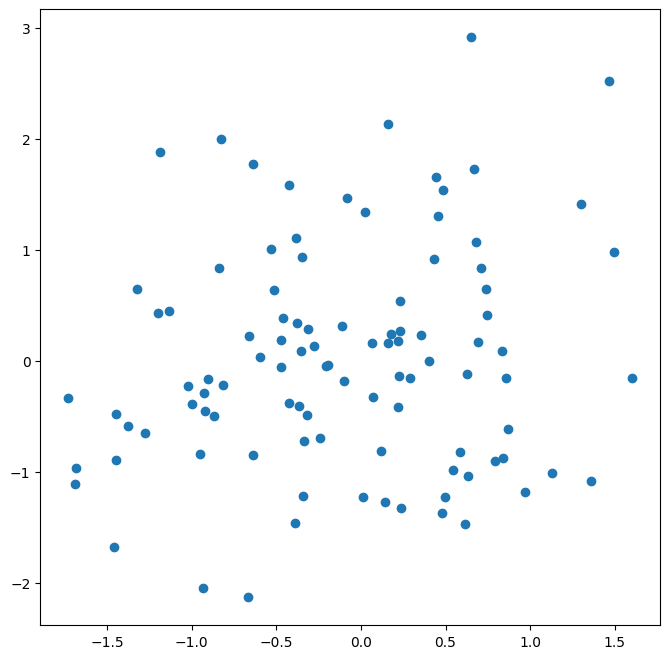

In [31]:
fig, ax = subplots(figsize=(8, 8))
x = rng.standard_normal(100) 
y = rng.standard_normal(100) 
ax.plot(x, y, 'o');

Enquanto o código acima cria um plot de dispersão entre as variáveis x e y, é possível atingir o mesmo resultado utilizando a seguinte função:

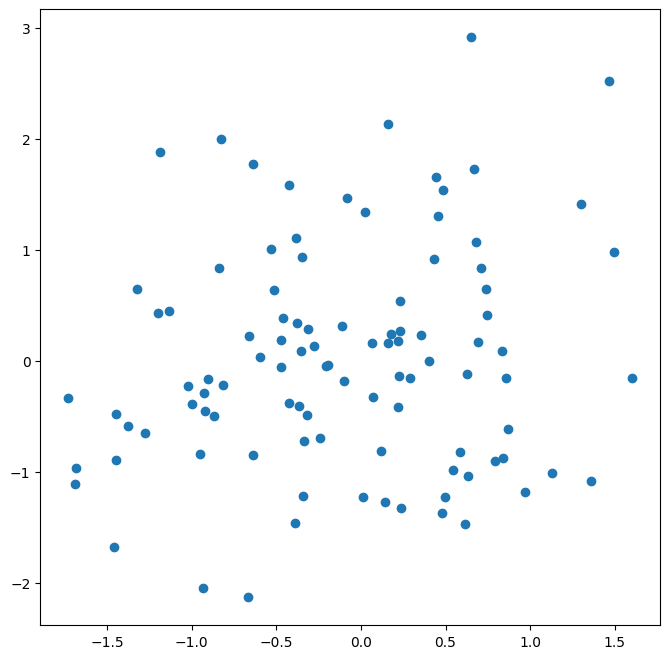

In [32]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y, marker='o');

Nós podemos ainda acrescentar ao nosso gráfico algumas informações importantes como título e título dos eixos:

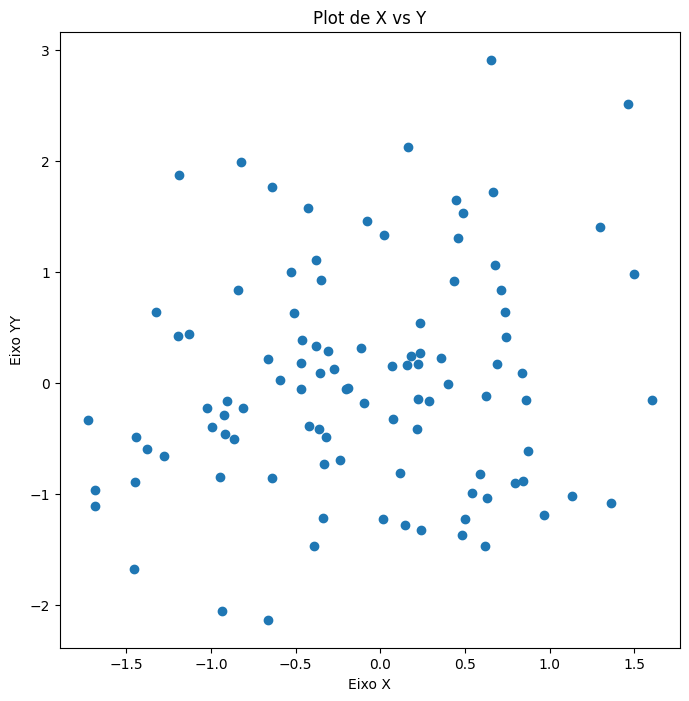

In [33]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(x, y, marker='o')
ax.set_xlabel("Eixo X")
ax.set_ylabel("Eixo YY")
ax.set_title("Plot de X vs Y");

Podemos ainda alterar as dimensões da figura para facilitar a visualização:

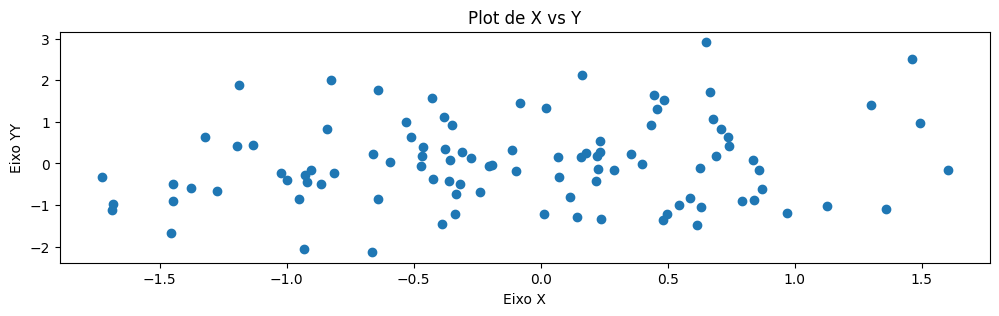

In [34]:
fig.set_size_inches(12,3)
fig

Também é possível gerar diversos subplots dentro da mesma figura, trazendo diferentes informações:

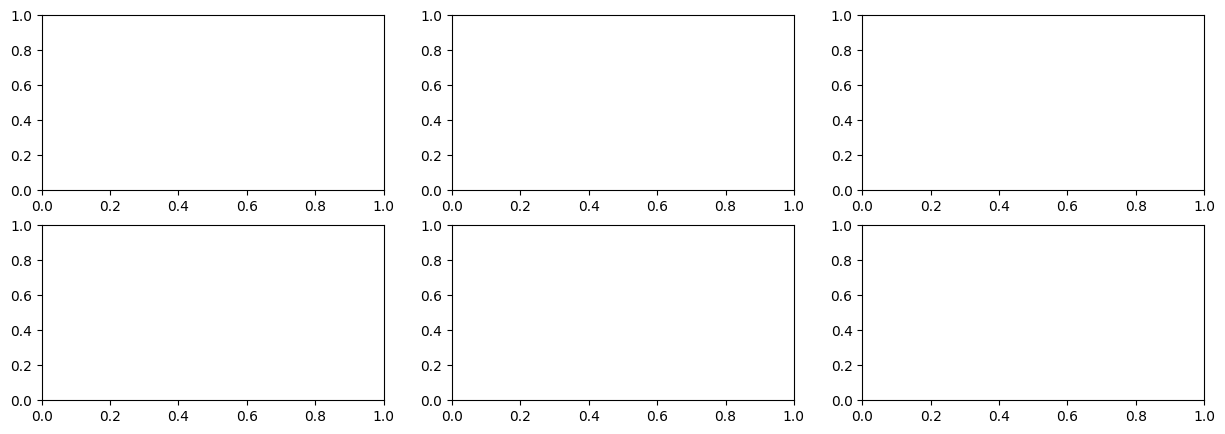

In [35]:
fig, axes = subplots(nrows=2,
ncols=3,
figsize=(15, 5))

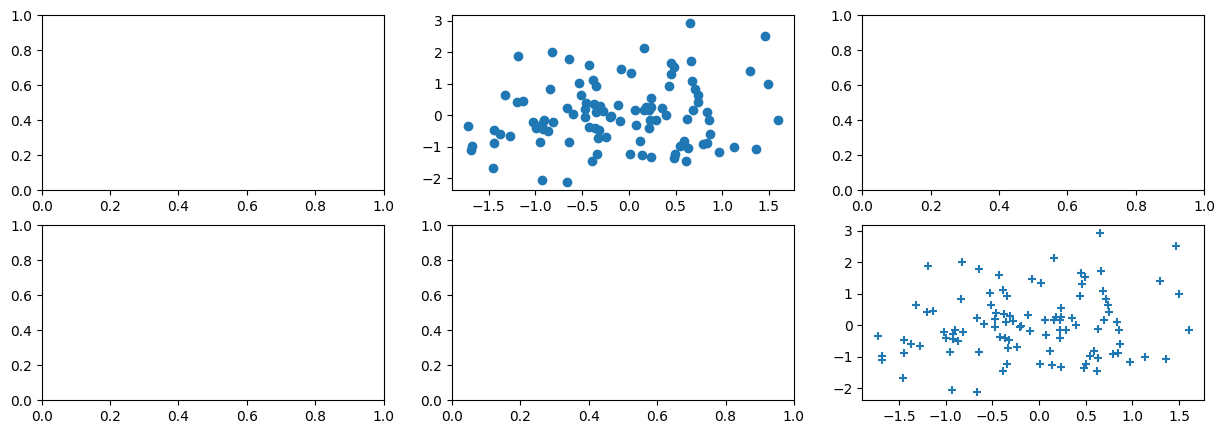

In [36]:
axes[0,1].plot(x, y, 'o')
axes[1,2].scatter(x, y, marker='+')
fig

Agora, vamos criar gráficos um pouco mais sofisticados. A função ax.contour cria curvas de nível baseados em valores de 3 variáveis: X, Y e f. Vamos criar as curvas de nível para uma função qualquer:

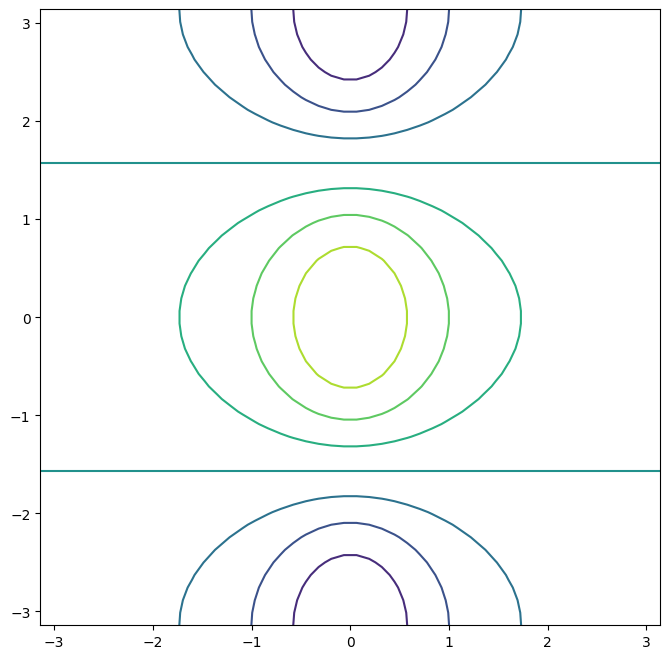

In [37]:
fig, ax = subplots(figsize=(8, 8))
x = np.linspace(-np.pi, np.pi, 50) #gera 50 valores entre -pi e pi
y = x 
f = np.multiply.outer(np.cos(y), 1 / (1 + x**2)) 
ax.contour(x, y, f);

Podemos ainda aumentar a quantidade de curvas de nível utilizando o parâmetro levels de contour:

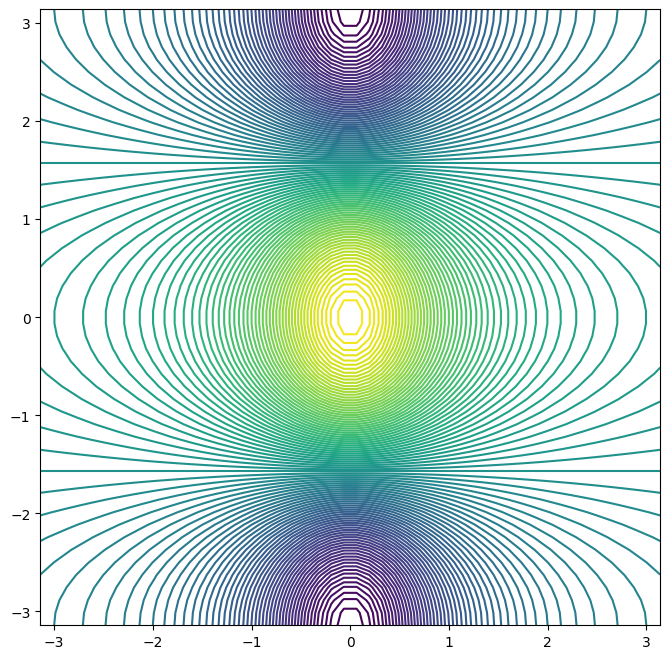

In [38]:
fig, ax = subplots(figsize=(8, 8))
x = np.linspace(-np.pi, np.pi, 50) #gera 50 valores entre -pi e pi
y = x 
f = np.multiply.outer(np.cos(y), 1 / (1 + x**2)) 
ax.contour(x, y, f, levels=100);

A função imshow mostra os mesmos dados de f como um mapa de calor:

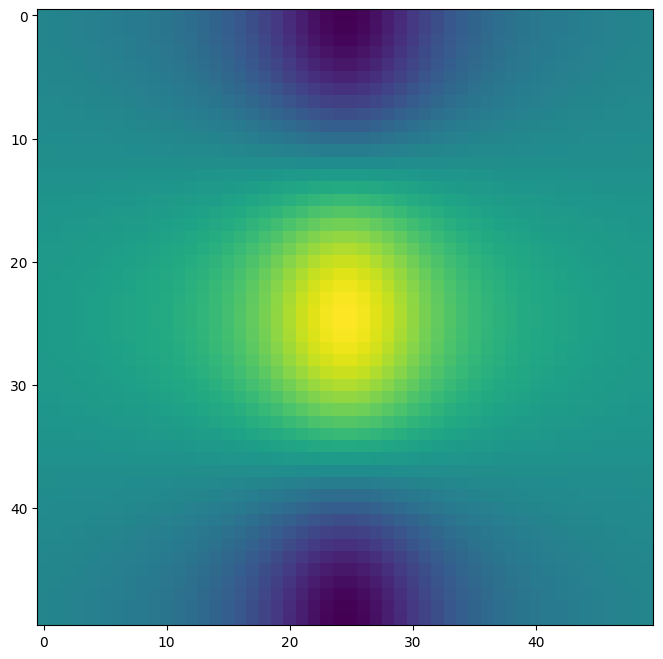

In [39]:
fig, ax = subplots(figsize=(8, 8))
ax.imshow(f);


### Sequências

Como vimos, o métodos linspace é cara de criar uma sequência de valores entre dois números em intervalos regulares:

In [40]:
seq1 = np.linspace(0, 10, 11)
seq1

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

Outra alternativa é o arange, em que em vez de escolhermos o número de elementos, nós escolhemos o intervalo entre cada elemento:

In [41]:
seq2 = np.arange(0, 10, 2)
seq2

array([0, 2, 4, 6, 8])

Note que neste caso, o 10, limite final do range, não é inclusivo na lista.

### Indexando dados

Como vimos nas seções anteriores, é possível acessar um elemento específico de uma matriz através de seus índices, por exemplo A[1, 2] acessa a segunda linha e terceira coluna da matriz A. Mas também é possível acessar múltiplos elementos de A ao mesmo tempo. Por exemplo, A[[1,3]] retorna as linhas 2 e 4 da matriz:

In [42]:
A = np.array(np.arange(16)).reshape((4, 4)) 
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [43]:
A[[1,3]]

array([[ 4,  5,  6,  7],
       [12, 13, 14, 15]])

Para retornar as colunas utilizamos:

In [44]:
A[:, [0,2]]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10],
       [12, 14]])

Com estas ferramentas em mãos, podemos agora escolher sub-matrizes de A, selecionando primeiro as linhas e depois as colunas:

In [45]:
A[[1,3]][:,[0,2]]

array([[ 4,  6],
       [12, 14]])

Existem duas maneiras alternativas de obtermos uma submatriz:
1. A função np.ix_ abstrai a lógica anterior e nos permite obter os indices de uma sub-matriz a partir das linhas e colunas desejadas da matriz original.
2. Podemos usar uma notação de Slices como esta: A[1:4:2, 0:3:2]. Neste exemplo, estamos selecionando todas as linhas de indices 1 a 4 de 2 em 2 e todas as colunas de indices 0 a 3 de 2 em 2 também.

In [46]:
idx = np.ix_([1,3], [0,2,3])
A[idx]

array([[ 4,  6,  7],
       [12, 14, 15]])

In [47]:
A[1:4:2, 0:3:2]

array([[ 4,  6],
       [12, 14]])

Quanto ao tema de indexação de arrays no numpy, precisamos tomar alguns cuidados pois em Python temos tanto as variáveis booleanas (bool) como os inteiros (int). Existe uma equivalência de valor entre inteiros e booleanos tal que True == 1 e False == 0. No entanto, estes valores não são equivalente no numpy. O que isto quer dizer é o seguinte: selecionar valores de uma matriz utilizando inteiros e booleanos tras resultados diferentes ainda que as listas possam ser iguais. Vamos analisar este caso na prática:

Começamos gerando uma lista de booleanos para cada linha de A e setando alguns valores para True enquanto outros ficam como False:

In [48]:
keep_rows = np.zeros(A.shape[0], bool)
keep_rows

array([False, False, False, False])

In [49]:
keep_rows[[1,3]] = True
keep_rows


array([False,  True, False,  True])

Note que a lista que criamos é equivalente a uma lista [0, 1, 0, 1]. Ou seja, se compararmos elemento a elemento, sempre obteremos True como o resultado da comparação entre keep_rows e [0, 1, 0, 1]:

In [50]:
np.all(keep_rows == np.array([0,1,0,1]))

True

No entanto, selecionar uma sub-matriz de A usando a lista de booleanos e de inteiros trará resultados diferentes. A lista de inteiros será tratada como uma seleção de indices. Ou seja, retornará as linhas de indice 0, 1, 0, 1:

In [51]:
A[np.array([0,1,0,1])]

array([[0, 1, 2, 3],
       [4, 5, 6, 7],
       [0, 1, 2, 3],
       [4, 5, 6, 7]])

Por outro lado, a lista de booleanos retornará apenas as linhas cujos indices estão na mesma posição que um booleano True. Ou seja, apenas as linhas 2 e 4 neste caso:

In [52]:
A[keep_rows]

array([[ 4,  5,  6,  7],
       [12, 13, 14, 15]])

É possível simplificar este processo utilizando a função ix_ novamente para selecionar as colunas de interesse assim como as linhas e obter um mapa de elementos que desejamos obter:

In [53]:
keep_cols = np.zeros(A.shape[1], bool)
keep_cols[[0, 2, 3]] = True
idx_bool = np.ix_(keep_rows, keep_cols)
A[idx_bool]

array([[ 4,  6,  7],
       [12, 14, 15]])

### Carregando Dados

Frequentemente, quando trabalhamos com dados queremos carregar dados em nosso código para poder manipulá-lo e extrair informações, e etc. Tipicamente, carregamos estes dados como uma sequência de Arrays todas de mesmo tamanho, onde o tamanho do Array representa o número de colunas da tabela. Este formato de carregar dados tabulares é chamado de DataFrame e o pandas é uma biblioteca comum para carregar e manipular estes dados:

In [54]:
import pandas as pd

In [55]:
Auto = pd.read_csv('Auto.csv')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


Podemos selecionar dados desta tabela:

In [56]:
Auto['horsepower']

0      130
1      165
2      150
3      150
4      140
      ... 
392     86
393     52
394     84
395     79
396     82
Name: horsepower, Length: 397, dtype: object

Notamos aqui que esta coluna "horsepower" foi carregada sendo interpretada como uma coluna de strings (texto). No entanto, ela parece ser de inteiros. Podemos olhar para os valores únicos da coluna para entender porque ela foi carregada desta forma:

In [57]:
np.unique(Auto['horsepower'])

array(['100', '102', '103', '105', '107', '108', '110', '112', '113',
       '115', '116', '120', '122', '125', '129', '130', '132', '133',
       '135', '137', '138', '139', '140', '142', '145', '148', '149',
       '150', '152', '153', '155', '158', '160', '165', '167', '170',
       '175', '180', '190', '193', '198', '200', '208', '210', '215',
       '220', '225', '230', '46', '48', '49', '52', '53', '54', '58',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '82',
       '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93',
       '94', '95', '96', '97', '98', '?'], dtype=object)

Temos entradas com um ponto de interrogação no lugar do valor de horsepower!
Podemos corrigir este problema passando um argumento na_values para a função read_csv, que vai trocar todo valor "?" por um np.nan. Um tipo nulo que não interfere no carregamento dos dados como um tipo número:

In [58]:
Auto = pd.read_csv('Auto.csv',
                    na_values=['?'])

Auto['horsepower'].sum()

40952.0

Olhando para o DataFrame, também podemos extrair o formato dele:

In [59]:
Auto.shape

(397, 9)

E podemos avaliar a mudança no formato ao eliminarmos as linhas que contém valores faltantes, descartando os NA:

In [60]:
Auto_new = Auto.dropna()
Auto_new.shape

(392, 9)

### Selecionando Linhas e Colunas em DataFrames

Podemos observar uma lista das colunas de nosso dataframe utilizando o seguinte comando:

In [61]:
Auto = Auto_new
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

Podemos passar os indices que queremos para selecionar as linhas de um DataFrame de forma similar ao que ocorre no numpy:

In [62]:
Auto[:3]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite


E podemos gerar uma lista de Booleanos para selecionar linhas também:

In [63]:
idx_80 = Auto['year'] > 80 
Auto[idx_80]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
338,27.2,4,135.0,84.0,2490,15.7,81,1,plymouth reliant
339,26.6,4,151.0,84.0,2635,16.4,81,1,buick skylark
340,25.8,4,156.0,92.0,2620,14.4,81,1,dodge aries wagon (sw)
341,23.5,6,173.0,110.0,2725,12.6,81,1,chevrolet citation
342,30.0,4,135.0,84.0,2385,12.9,81,1,plymouth reliant
343,39.1,4,79.0,58.0,1755,16.9,81,3,toyota starlet
344,39.0,4,86.0,64.0,1875,16.4,81,1,plymouth champ
345,35.1,4,81.0,60.0,1760,16.1,81,3,honda civic 1300
346,32.3,4,97.0,67.0,2065,17.8,81,3,subaru
347,37.0,4,85.0,65.0,1975,19.4,81,3,datsun 210 mpg


No entanto, se ao invés de indices passamos uma lista de strings, então vamos estar filtrando apenas as colunas do DataFrame:

In [64]:
Auto[['mpg', 'horsepower']]

,mpg,horsepower
0,18.0,130.0
1,15.0,165.0
2,18.0,150.0
3,16.0,150.0
4,17.0,140.0
...,...,...
392,27.0,86.0
393,44.0,52.0
394,32.0,84.0
395,28.0,79.0


Neste caso, note que os indices das linhas estão numerados de 0 a 396 em ordem. Isto ocorre pois o pandas sempre cria indices para as linhas das colunas. No entanto, podemos acessar os dados utilizando outros indices, utilizando uma coluna do DataFrame como indice por exemplo:

In [65]:
Auto_re = Auto.set_index('name')
Auto_re

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1


Veja que agora a coluna name já não é mais uma coluna do DataFrame, mas sim o próprio índice:

In [66]:
Auto_re.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

Dado que a coluna name agora representa os indices das colunas, podemos utilizar o comando loc para buscar pelas linhas baseadas neste indice:

In [67]:
rows = ['amc rebel sst', 'ford torino']
Auto_re.loc[rows]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


Mas ainda podemos acessar as colunas através dos indices numéricos em ordem utilizando a função iloc:

In [68]:
Auto_re.iloc[[3,4]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


A função iloc ainda nos permite filtrar as colunas de um DataFrame assim como as linhas:

In [69]:
Auto_re.iloc[:,[0,2,3]]

,mpg,displacement,horsepower
name,,,
chevrolet chevelle malibu,18.0,307.0,130.0
buick skylark 320,15.0,350.0,165.0
plymouth satellite,18.0,318.0,150.0
amc rebel sst,16.0,304.0,150.0
ford torino,17.0,302.0,140.0
...,...,...,...
ford mustang gl,27.0,140.0,86.0
vw pickup,44.0,97.0,52.0
dodge rampage,32.0,135.0,84.0


In [70]:
Auto_re.iloc[[3,4],[0,2,3]]

,mpg,displacement,horsepower
name,,,
amc rebel sst,16.0,304.0,150.0
ford torino,17.0,302.0,140.0


Os indices também não precisam ser únicos nos DataFrames, por exemplo:

In [71]:
Auto_re.loc['ford galaxie 500', [ 'mpg', 'origin']]

,mpg,origin
name,,
ford galaxie 500,15.0,1
ford galaxie 500,14.0,1
ford galaxie 500,14.0,1


Podemos ir além ao selecionarmos linhas e colunas de nossos Dataframes e filtrarmos o DataFrame baseado em sequências de True e False baseado nas linhas ordenadas:

In [72]:
idx_80 = Auto_re['year'] > 80 
Auto_re.loc[idx_80, ['weight', 'origin']]

,weight,origin
name,,
plymouth reliant,2490,1
buick skylark,2635,1
dodge aries wagon (sw),2620,1
chevrolet citation,2725,1
plymouth reliant,2385,1
toyota starlet,1755,3
plymouth champ,1875,1
honda civic 1300,1760,3
subaru,2065,3


Ou alternativamente:

In [73]:
Auto_re.loc[lambda df: df['year'] > 80, [ 'weight', 'origin']]

,weight,origin
name,,
plymouth reliant,2490,1
buick skylark,2635,1
dodge aries wagon (sw),2620,1
chevrolet citation,2725,1
plymouth reliant,2385,1
toyota starlet,1755,3
plymouth champ,1875,1
honda civic 1300,1760,3
subaru,2065,3


Lambda é uma funcionalidade especial em python que nos permite criar uma função que recebe um argumento e aplica uma lógica sobre ele, neste caso o próprio dataframe é passado como argumento.

### For Loops

Os loops for são uma ferramenta comum e muito útil de praticamente qualquer linguagem de programação que nos permite iterar sobre uma sequencia de valores.

In [75]:
total = 0
for value in [3,2,19]:
    total += value
print('Total is: {0}'.format(total))

Total is: 24


Também podemos associar conjuntamente múltiplos for-loops:

In [77]:
total = 0
for value in [2,3,19]:
    for weight in [3, 2, 1]:
        total += value * weight
print('Total is: {0}'.format(total))

Total is: 144


Ou ainda, associar valores múltiplos valores para gerar uma única lista onde cada elemento tem dois valores:

In [79]:
total = 0
for value, weight in zip([2,3,19],[0.2,0.3,0.5]):
    total += weight * value
print('Weighted average is: {0}'.format(total))

Weighted average is: 10.8


### Formatação de Strings

Em python, temos excelentes ferramentas para construir Strings utilizando valores que obtemos dos nossos dados. Para ilustrar isto, vamos iniciar gerando dados em um DataFrame de 127 linhas e 5 colunas que vem de uma distribuição normal, mas vamos substituir 20% dos valores da coluna por um tipo NaN:

In [81]:
rng = np.random.default_rng(42)
A = rng.standard_normal((127, 5)) 
M = rng.choice([0, np.nan], p=[0.8,0.2], size=A.shape) 
A += M 
D = pd.DataFrame(A, columns=[ 'food',
'bar',
'pickle',
'snack',
'popcorn'])
D[:3]

,food,bar,pickle,snack,popcorn
0,0.304717,NaN,0.750451,0.940565,-1.951035
1,-1.302180,NaN,NaN,-0.016801,-0.853044
2,0.879398,0.777792,NaN,1.127241,0.467509


In [83]:
for col in D.columns:
    template = 'A coluna "{0}" possui {1:.2%} valores faltantes'
    print(template.format(col, np.isnan(D[col]).mean()))


A coluna "food" possui 18.90% valores faltantes
A coluna "bar" possui 17.32% valores faltantes
A coluna "pickle" possui 23.62% valores faltantes
A coluna "snack" possui 21.26% valores faltantes
A coluna "popcorn" possui 19.69% valores faltantes


### Outros Resumos Gráficos e Numéricos

A função plot do objeto ax de subplots gera um gráfico de dispersão:

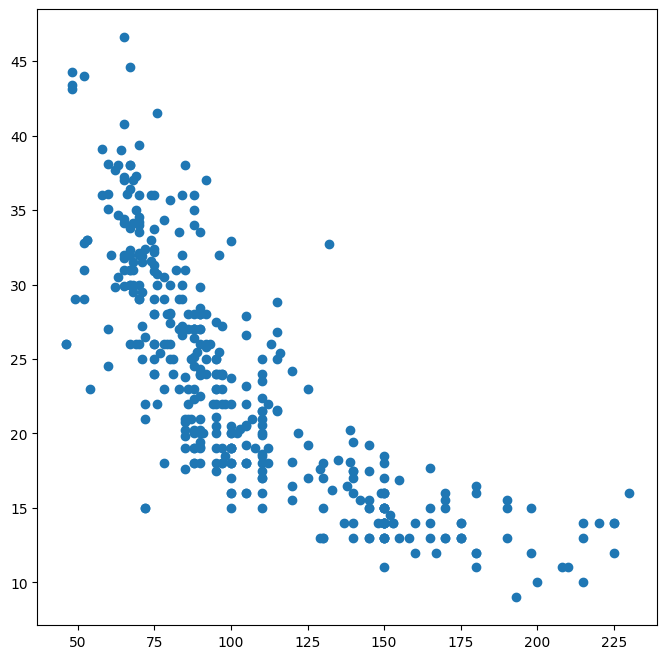

In [84]:
fig, ax = subplots(figsize=(8, 8))
ax.plot(Auto['horsepower'], Auto['mpg'], 'o');

Plot também é um método do DataFrame em Pandas, permitindo que plotemos este gráfico de forma ainda mais simples:

Text(0.5, 1.0, 'Horsepower vs. MPG')

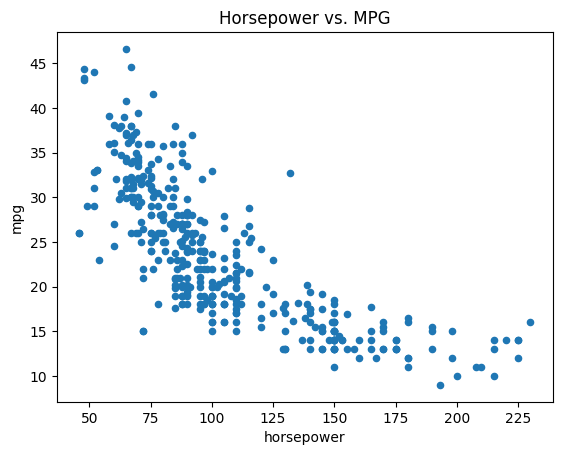

In [85]:
ax = Auto.plot.scatter('horsepower', 'mpg');
ax.set_title('Horsepower vs. MPG')

Também é possível definir em qual subplot o gráfico deve ser plotado em casos onde temos mais de um subplot:

<Axes: xlabel='horsepower', ylabel='mpg'>

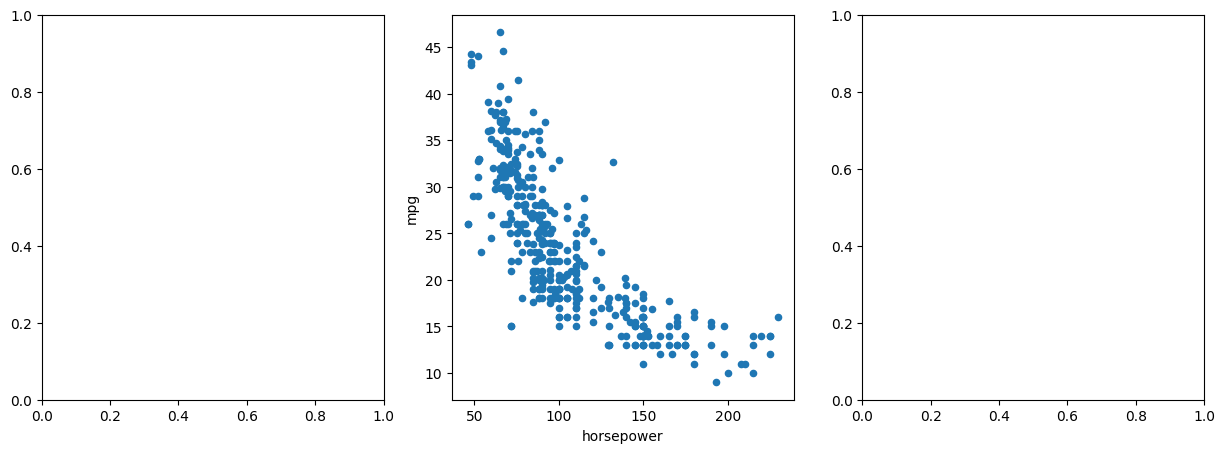

In [87]:
fig, axes = subplots(ncols=3, figsize=(15, 5))
Auto.plot.scatter('horsepower', 'mpg', ax=axes[1])

É possível definir o tipo de uma coluna em Pandas convertendo um objeto series e substituindo a coluna original, desta forma:

In [88]:
Auto.cylinders = pd.Series(Auto.cylinders, dtype='category')
Auto.cylinders.dtype

CategoricalDtype(categories=[3, 4, 5, 6, 8], ordered=False, categories_dtype=int64)

E agora podemos plotar um boxplot baseado nessa coluna:

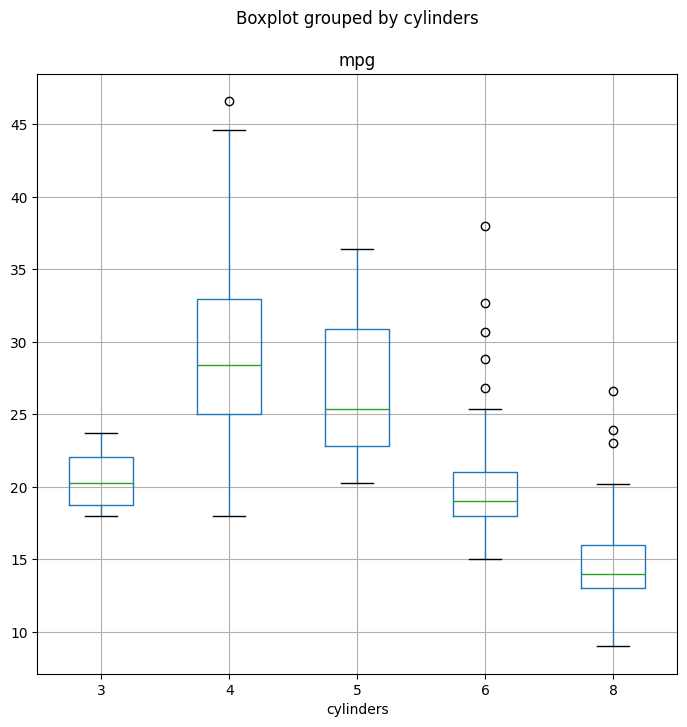

In [89]:
fig, ax = subplots(figsize=(8, 8))
Auto.boxplot('mpg', by= 'cylinders', ax=ax);

Com o matplotlib, podemos também gerar um histograma:

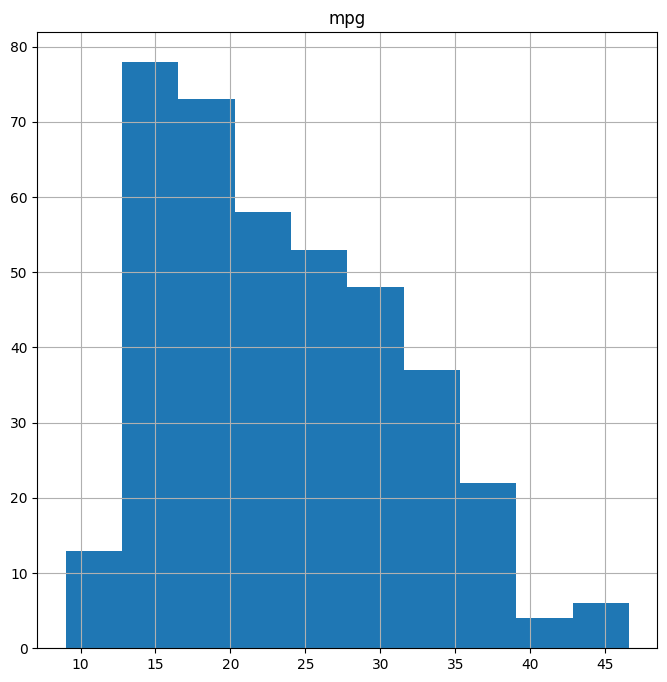

In [90]:
fig, ax = subplots(figsize=(8, 8))
Auto.hist('mpg', ax=ax);

Podemos também acessar a combinação de quaisquer duas variáveis do DataFrame utilizando o scatter_matrix:

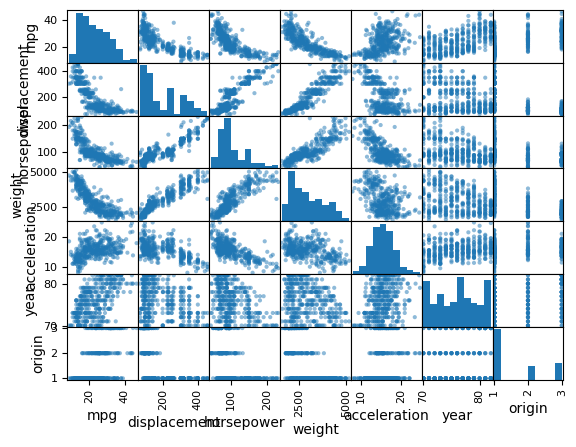

In [91]:
pd.plotting.scatter_matrix(Auto);

E uma descrição simples do DataFrame e suas colunas pode ser obtida com o método describe:

In [92]:
Auto[['mpg', 'weight']].describe()

,mpg,weight
count,392.000000,392.000000
mean,23.445918,2977.584184
std,7.805007,849.402560
min,9.000000,1613.000000
25%,17.000000,2225.250000
50%,22.750000,2803.500000
75%,29.000000,3614.750000
max,46.600000,5140.000000
